In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("spam.csv",encoding="latin-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df=df.rename(columns={"v1":"label","v2":"text"})

In [6]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
df.shape

(5572, 2)

In [9]:
df.size

11144

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df.isnull()

,label,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [13]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [14]:
df.isnull().values.any()

False

In [15]:
df.duplicated().values.any()

True

In [16]:
df.duplicated().sum()

403

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

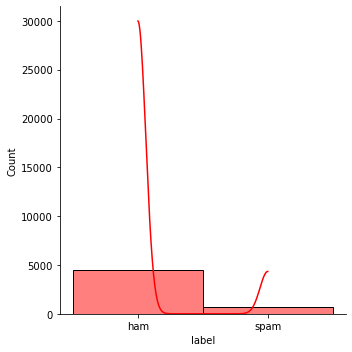

In [19]:
sns.displot(df.label, kde =True, color = "red")

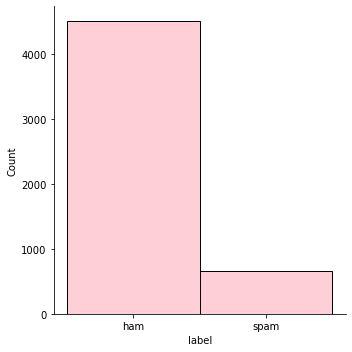

In [20]:
sns.displot(df.label, color = "pink")

In [21]:
print("No of rows",len(df))

No of rows 5169


In [22]:
df.label.value_counts()

ham     4516
spam     653
Name: label, dtype: int64

In [23]:
df['length']=df['text'].apply(len)
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

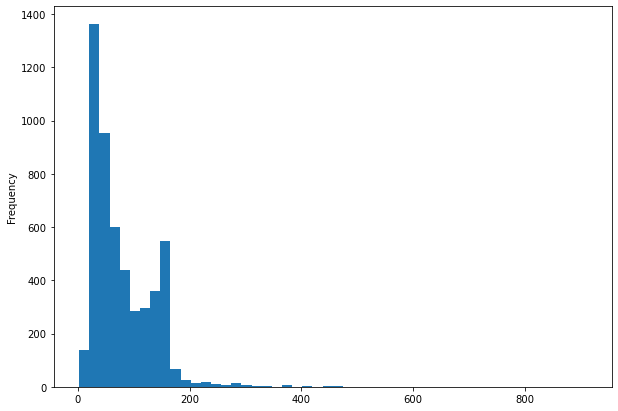

In [26]:
df['length'].plot(bins=50,kind='hist',figsize=(10,7))

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

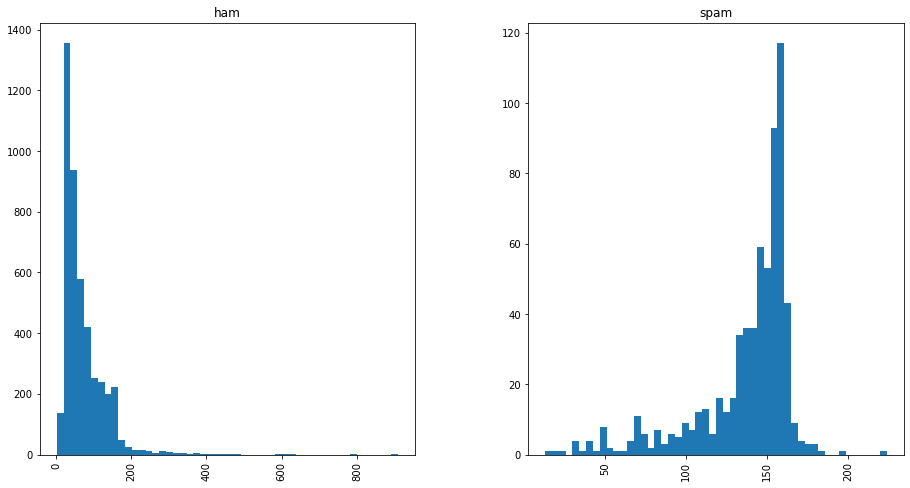

In [27]:
df.hist(column='length',by='label',bins=50,figsize=(15,8))

# LabelEncoder to encode categorical variable(label) to numeric

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"].values)

In [29]:
df.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# TF-IDF Vectorization

In [31]:
vectorizer = TfidfVectorizer()

In [33]:
X = vectorizer.fit_transform(df["text"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
y = df["label"]

In [35]:
X.shape

(5169, 8672)

In [36]:
y.shape

(5169,)

In [37]:
df.count()

label     5169
text      5169
length    5169
dtype: int64

# PieChart

In [38]:
p, k = len(df[df["label"] == 0]), len(df[df["label"] == 1])

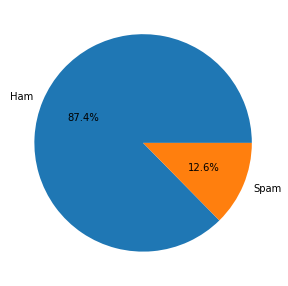

In [39]:
label = np.array(["Ham", "Spam"])
values = np.array([p, k])
plt.figure(figsize=(5, 5))
plt.pie(values, labels=label, autopct="%.1f%%")
plt.show()


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Classifier

In [41]:
naive_bayes_model = MultinomialNB()

In [42]:
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [43]:
nbc_predictions = naive_bayes_model.predict(X_test)

In [44]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nbc_predictions))
print(classification_report(y_test, nbc_predictions))
print("Accuracy: ", accuracy_score(y_test, nbc_predictions))
print("r2_Score: ", r2_score(y_test, nbc_predictions))
print("Precision_score: ", precision_score(y_test, nbc_predictions))
print("Recall_score: ", recall_score(y_test, nbc_predictions))
print("f1_score: ", f1_score(y_test, nbc_predictions))

Naive Bayes Model:
[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
r2_Score:  0.6310150886311625
Precision_score:  1.0
Recall_score:  0.6827586206896552
f1_score:  0.8114754098360656


In [46]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes_model = BernoulliNB()

In [47]:
naive_bayes_model.fit(X_train, y_train)

BernoulliNB()

In [48]:
nbc_predictions = naive_bayes_model.predict(X_test)

In [49]:
print("Naive Bayes Model Using BernoulliNB:")
print(confusion_matrix(y_test, nbc_predictions))
print(classification_report(y_test, nbc_predictions))
print("Accuracy: ", accuracy_score(y_test, nbc_predictions))
print("r2_Score: ", r2_score(y_test, nbc_predictions))
print("Precision_score: ", precision_score(y_test, nbc_predictions))
print("Recall_score: ", recall_score(y_test, nbc_predictions))
print("f1_score: ", f1_score(y_test, nbc_predictions))

Naive Bayes Model Using BernoulliNB:
[[886   3]
 [ 21 124]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.86      0.91       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy:  0.97678916827853
r2_Score:  0.8074861331988674
Precision_score:  0.9763779527559056
Recall_score:  0.8551724137931035
f1_score:  0.911764705882353


# Train Logistic Regression Model

In [50]:
logistic_regression_model = LogisticRegression()

In [51]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [52]:
lr_predictions = logistic_regression_model.predict(X_test)

In [53]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))
print("Precision_score: ", precision_score(y_test, lr_predictions))
print("Recall_score: ", recall_score(y_test, lr_predictions))
print("f1_score: ", f1_score(y_test, lr_predictions))

Logistic Regression Model:
[[886   3]
 [ 43 102]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
r2_Score:  0.6310150886311625
Precision_score:  0.9714285714285714
Recall_score:  0.7034482758620689
f1_score:  0.8160000000000001


# Train Support Vector Machine (SVM) Model

In [54]:
svm_model = SVC(kernel='linear')

In [55]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [56]:
svm_predictions = svm_model.predict(X_test)

In [57]:
print("Support Vector Machine (SVM) Model:")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))
print("Accuracy: ", accuracy_score(y_test, svm_predictions))
print("r2_Score: ", r2_score(y_test, svm_predictions))
print("Precision_score: ", precision_score(y_test, svm_predictions))
print("Recall_score: ", recall_score(y_test, svm_predictions))
print("f1_score: ", f1_score(y_test, svm_predictions))

Support Vector Machine (SVM) Model:
[[886   3]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.90      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy:  0.9835589941972921
r2_Score:  0.8636360110158644
Precision_score:  0.9776119402985075
Recall_score:  0.903448275862069
f1_score:  0.939068100358423


# Comparison between models

In [58]:
models = ['Naive Bayes Classifier', 'Logistic Regression', 'Support Vector Machine']
accuracies = [accuracy_score(y_test, nbc_predictions),
              accuracy_score(y_test, lr_predictions),
              accuracy_score(y_test, svm_predictions)]

comparison_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print("\nAccuracy Comparison:")
print(comparison_df)


Accuracy Comparison:
                    Model  Accuracy
0  Naive Bayes Classifier  0.976789
1     Logistic Regression  0.955513
2  Support Vector Machine  0.983559
